# Assignment

In this assignment, we want to implement cross-validation for logistic regression. Cross-validation is a powerful technique for model selection (such as when choosing the right hyper-parameters), especially when the data size is not very large. The goal of this assignment is to first implement cross-validation and compare it to a baseline model (with no cross-validation).

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
%matplotlib inline
random_state = 0

### Get Data
Read in `AmesFeatures.csv` which contains the processed data from the lecture.  This data file can be found in canvas.  If you want, you can generate this data file yourself by uncommenting the line `# AmesFeatures.to_csv('AmesFeatures.csv', index=False)` in file `Lesson_10_b_Student.ipynb`.  You may need to change the path below.  <br/><span style="color:red" float:right>[0 point]</span>

In [2]:
AmesFeatures = pd.read_csv('AmesFeatures.csv')
y = (AmesFeatures['SalePrice'] > 200000) & (AmesFeatures['SalePrice'] < 230000)
X = AmesFeatures.drop(columns=['Id', 'SalePrice'])
display(y.value_counts())
display(X.shape)
display(X)
display(y)

False    1330
True      130
Name: SalePrice, dtype: int64

(1460, 91)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,60.0,8450.0,7.0,5.0,2003.0,2003.0,706.0,0.0,150.0,856.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,20.0,9600.0,6.0,8.0,1976.0,1976.0,978.0,0.0,284.0,1262.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,60.0,11250.0,7.0,5.0,2001.0,2002.0,486.0,0.0,434.0,920.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,70.0,9550.0,7.0,5.0,1915.0,1970.0,216.0,0.0,540.0,756.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,60.0,14260.0,8.0,5.0,2000.0,2000.0,655.0,0.0,490.0,1145.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,953.0,953.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1456,20.0,13175.0,6.0,6.0,1978.0,1988.0,790.0,163.0,589.0,1542.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1457,70.0,9042.0,7.0,9.0,1941.0,2006.0,275.0,0.0,877.0,1152.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1458,20.0,9717.0,5.0,6.0,1950.0,1996.0,49.0,1029.0,0.0,1078.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


0        True
1       False
2        True
3       False
4       False
        ...  
1455    False
1456     True
1457    False
1458    False
1459    False
Name: SalePrice, Length: 1460, dtype: bool

In [3]:
# review dtypes
AmesFeatures.dtypes.unique()

array([dtype('float64')], dtype=object)

**All the dtypes are floats so we dont have to do any onehot encoding. It also looks like the onehot encoding has already been done for this dataset.**

Use some of the code from the lecture. 
- Split X and y into X_train, X_test, y_train, and y_test using `test_size = 0.30`.  You may want to use `random_state = 0` to make your results the same as others 
- Present the counts for False and True in y_train and y_test to verify the imbalanced data in your train and test sets
<br/><span style="color:red" float:right>[0 point]</span>

In [4]:
# Add code here to splt data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = random_state)
# Add code to present the imbalance of the class labels for both test and training
print('Training data value counts')
display(y_train.value_counts())
print()
print('Testing data value counts')
display(y_test.value_counts())



Training data value counts


False    930
True      92
Name: SalePrice, dtype: int64


Testing data value counts


False    400
True      38
Name: SalePrice, dtype: int64

In [5]:
# Reset index of X_test and X_train
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)

# review
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,60.0,9375.0,7.0,5.0,1997.0,1998.0,739.0,0.0,318.0,1057.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,120.0,2887.0,6.0,5.0,1996.0,1997.0,1003.0,0.0,288.0,1291.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,20.0,7207.0,5.0,7.0,1958.0,2008.0,696.0,0.0,162.0,858.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,50.0,9060.0,6.0,5.0,1939.0,1950.0,204.0,0.0,356.0,560.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,30.0,8400.0,2.0,5.0,1920.0,1950.0,290.0,0.0,0.0,290.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [6]:
# create column names
col_names = list(X_train.columns)
# sanity check
col_names[:5]

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt']

**The number of 'True' occurrences vs 'False' in both testing and training are about 10% of the total data showing there is a major imbalance in the data.**

1. Train basic `LogisticRegression` classifier (repeat what was done in class)
 1. Train a model with `X_train` and `y_train`
 2. predict (hard baseline and soft) on training and test features with `.predict()` and `.predict_proba()`
 3. evaluate model using confusion matrix (`confusion_matrix`) and its metrics (`classification_report`)
 4. evaluate model using ROC and AUC of ROC
 5. comment on the model's usability. 
<br/><span style="color:red" float:right>[2 point]</span>

In [7]:
# Standardize the x_train and x_test data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the training data
scaler.fit(X_train)

# transform both X_train and X_test
X_train_norm = pd.DataFrame(scaler.transform(X_train), columns = col_names)
X_test_norm = pd.DataFrame(scaler.transform(X_test), columns = col_names)

# review/sanity check
X_train_norm.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,0.080340,-0.115977,0.678402,-0.503226,0.862117,0.648981,0.690634,-0.298507,-0.572957,0.004040,...,-0.044281,-0.031296,0.314523,-0.266981,-0.170893,1.244439,-1.025772,-0.273237,-0.133897,0.308855
1,1.504170,-0.746722,-0.058396,-0.503226,0.829035,0.600190,1.304994,-0.298507,-0.642268,0.574723,...,-0.044281,-0.031296,0.314523,-0.266981,-0.170893,1.244439,-1.025772,-0.273237,-0.133897,0.308855
2,-0.868880,-0.326744,-0.795194,1.285634,-0.428097,1.136886,0.590567,-0.298507,-0.933377,-0.481285,...,-0.044281,-0.031296,0.314523,-0.266981,-0.170893,-0.803575,0.974875,-0.273237,-0.133897,0.308855
3,-0.156965,-0.146600,-0.058396,-0.503226,-1.056663,-1.692964,-0.554376,-0.298507,-0.485162,-1.208053,...,-0.044281,-0.031296,0.314523,-0.266981,-0.170893,-0.803575,0.974875,-0.273237,7.468452,-3.237769
4,-0.631575,-0.210764,-3.005590,-0.503226,-1.685229,-1.692964,-0.354244,-0.298507,-1.307659,-1.866533,...,-0.044281,-0.031296,-3.179418,-0.266981,5.851613,-0.803575,-1.025772,3.659831,-0.133897,-3.237769


In [8]:
# create Logistic Regression instance
lin_reg = LogisticRegression(random_state=42)

# fit the regressor with training data
lin_reg.fit(X_train_norm, y_train)

LogisticRegression(random_state=42)

In [9]:
# hard predictions
y_hat_train_hard = lin_reg.predict(X_train_norm)
y_hat_test_hard = lin_reg.predict(X_test_norm)

# soft predictions
y_hat_train_soft = lin_reg.predict_proba(X_train_norm)[:,1]
y_hat_test_soft = lin_reg.predict_proba(X_test_norm)[:,1]

In [10]:
# review the testing hard vs soft prediction results
display(y_hat_test_hard[:5])
display(y_hat_test_soft[:5])

array([False, False, False, False, False])

array([0.26544092, 0.0002675 , 0.25767049, 0.04988268, 0.00172351])

**For the evaluation portion I will only be investigating the test case and not comparing it to the training case. We have already seen that the training model is often slightly more accurate than the testing model and always a little overfit.**

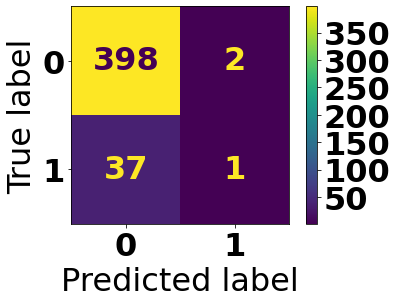

In [11]:
# hard prediction confusion matrix 
conmat_hard_test = confusion_matrix(y_test, y_hat_test_hard)
cmd = ConfusionMatrixDisplay(confusion_matrix=conmat_hard_test, display_labels=["0", "1"])
font = {'weight' : 'bold', 'size'   : 32}
plt.rc('font', **font)
cmd.plot();
plt.rcdefaults();

In [12]:
# hard prediction report
print(f'Accuracy: {accuracy_score(y_test, y_hat_test_hard)}')
print(classification_report(y_test, y_hat_test_hard))

Accuracy: 0.910958904109589
              precision    recall  f1-score   support

       False       0.91      0.99      0.95       400
        True       0.33      0.03      0.05        38

    accuracy                           0.91       438
   macro avg       0.62      0.51      0.50       438
weighted avg       0.86      0.91      0.87       438



**At first glance, it looks like the accuracy score is telling us this model is very good. Maybe a little too good. The classification report does show us that the precision for predicting our positive case is very low ~30%.**

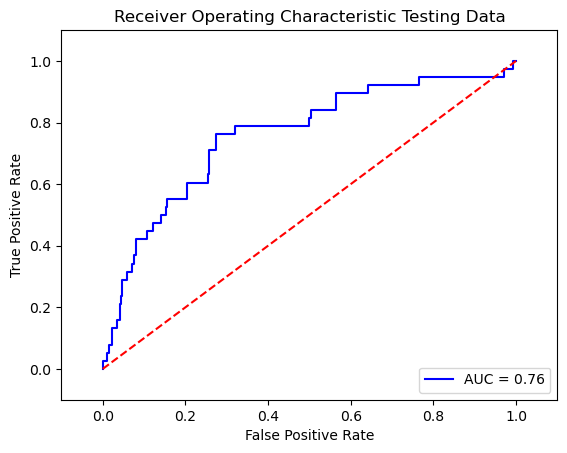

In [13]:
# soft prediction evaluation with roc
fpr, tpr, thresholds = roc_curve(y_test, y_hat_test_soft)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic Testing Data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Even though the AUC is deemed usable at 0.76, taking the confusion matrix into consideration we may want to re evaluate our model. The confusion matrix shows us that the false negative rate is actually pretty high. We are in fact missing many potential houses that fall within our budget. Seeing as the housing market is so competetive it would be better to have an algorithm that catches more of the actual cases.**

#### Add Comment on usability


2. Train `LogisticRegression` with balanced class weights 
 1. Read the documentation to see what `class_weight` does
 2. Train a new model with the same `X_train` and `y_train` settting `class_weight` so the weights are balanced
 3. predict (hard and soft) on training and test features with .predict() and .predict_proba()
 4. evaluate model using confusion matrix (confusion_matrix) and its metrics (classification_report)
 5. evaluate model using ROC
 6. How does balancing class weights change any of the results? Why?
<br/><span style="color:red" float:right>[3 point]</span>

In [14]:
# install imblearn
!pip install imblearn

In [15]:
# After reading the Oreilly book and seeing the make_pipeline capability of sklearn, I wanted to try to use it in this case.
# Add code here to train the logistic regression with balanced weights
try:
    from sklearn.pipeline import make_pipeline
except Exception as error:
        print('Caught this error: ' + repr(error))
        print('Try and restart the kernel, there seems to be an issue occassionally with importing a certain package, but')
        print('eventually, it works')
from imblearn.over_sampling import SMOTE

# set up pipeline
lr_pipeline = make_pipeline(StandardScaler(),
                           LogisticRegression(random_state=42))
# resample training set 
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

# fit resampled data to pipeline
lr_pipeline.fit(X_resampled, y_resampled)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

##### Here you might need to restart the kernel. I was having issues where it draws an error that it cannot import the "Distance Metrics"

In [16]:
# look at balances of y after resampling
y_resampled.value_counts()

True     930
False    930
Name: SalePrice, dtype: int64

In [17]:
# Add code to predict (hard and soft) on training and test features
y_aug_test_hard = lr_pipeline.predict(X_test)
y_aug_test_soft = lr_pipeline.predict_proba(X_test)[:,1]

In [18]:
# review predictions
display(y_aug_test_hard[:5])
display(y_aug_test_soft[:5])

array([ True, False, False, False, False])

array([9.11388277e-01, 1.97104748e-04, 3.95168084e-01, 4.42348343e-01,
       1.49632229e-03])

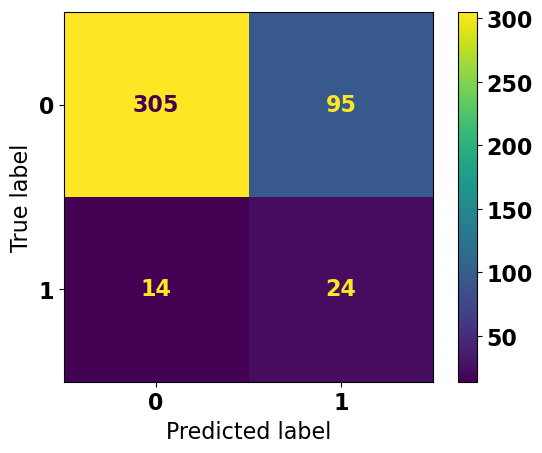

In [19]:
# Add code to evaluate predictions using confusion matrix and its metrics
conmat_hard_test = confusion_matrix(y_test, y_aug_test_hard)
cmd = ConfusionMatrixDisplay(confusion_matrix=conmat_hard_test, display_labels=["0", "1"])
font = {'weight' : 'bold', 'size'   : 16}
plt.rc('font', **font)
cmd.plot();
plt.rcdefaults();

In [20]:
# hard prediction report
print(f'Accuracy: {accuracy_score(y_test, y_aug_test_hard):.3f}')
print(f'Score from model: {lr_pipeline.score(X_test, y_test):.3f}')
print(classification_report(y_test, y_aug_test_hard))

Accuracy: 0.751
Score from model: 0.751
              precision    recall  f1-score   support

       False       0.96      0.76      0.85       400
        True       0.20      0.63      0.31        38

    accuracy                           0.75       438
   macro avg       0.58      0.70      0.58       438
weighted avg       0.89      0.75      0.80       438



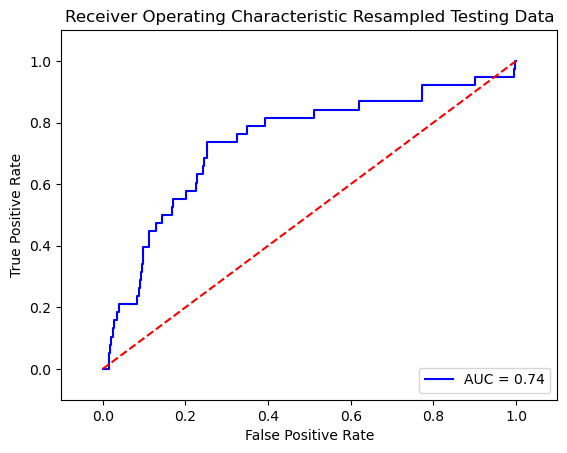

In [21]:
# soft prediction evaluation with roc of resampled data
fpr, tpr, thresholds = roc_curve(y_test, y_aug_test_soft)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic Resampled Testing Data')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### Effect of weight balancing
**If we compare the unbalanced test case to the balanced test case we might assume that the unbalanced test case performs better. The unbalanced test case has an accuracy of 91% compared to the balanced test case only having an accuracy of 75%. Even the AUC of the ROC is greater in the unbalanced test case .76 compared to .74. However, if we look closer at the confusion matrices of the two test cases we can see that balancing the test cases actually gives us a better model. The balanced model still has a valid AUC being above .72. Further, it does a better job of identifying TP instances where a house falls within our budget. While it does give us more false positives, meaning we would have to weed through more houses, that is ultimately ok as we would rather have more houses identified than fewer.**


3. Use `LogisticRegressionCV` to train a cross-validation logistic regression.  The CV stands for cross-validation.
 1. train a cross-validation logistic regression
    - Use the same `X_train` and `y_train`.
    - You may want to use `random_state = 0` to make your results the same as others.
    - Set the `cv` parameter to 5.  5 is the default value.
    - Set `class_weight` so the weights are balanced
 2. predict (hard and soft) on training and test features with `.predict()` and `.predict_proba()`
 3. evaluate test and training predictions using confusion matrix (`confusion_matrix`) and its metrics (`classification_report`)
 4. evaluate test and training predictions using ROC
 5. comment on whether cross-validation makes a difference in the results. 
<br/><span style="color:red" float:right>[3 point]</span>

In [22]:
import time

In [23]:
# Add code to train logistic regression cross-validation (cv = 5)
# make pipleline
lrcv_pipeline = make_pipeline(StandardScaler(),
                             LogisticRegressionCV(random_state=42, cv=5, class_weight='balanced'))


In [24]:
# fit to the pipeline
start = time.time()
lrcv_pipeline.fit(X_train, y_train)

# Add code to predict (hard and soft) on training and test features
y_hat_hard_cv = lrcv_pipeline.predict(X_test)
y_hat_soft_cv = lrcv_pipeline.predict_proba(X_test)[:,1]

end = time.time()
print('The total time to run the 5 fold training is:', round(end - start, 3), 'seconds')

The total time to run the 5 fold training is: 1.442 seconds


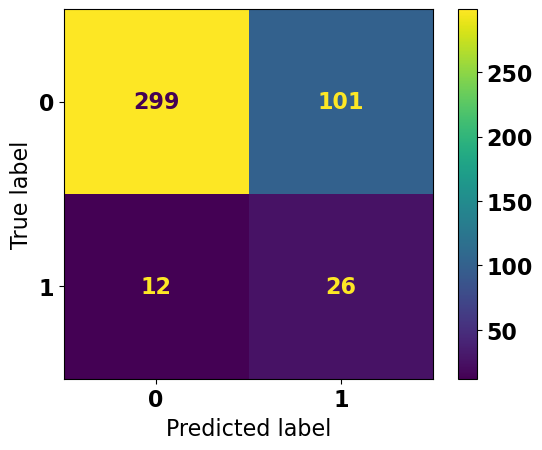

In [25]:
# Add code to evaluate predictions using confusion matrix and its metrics
conmat_hard_test = confusion_matrix(y_test, y_hat_hard_cv)
cmd = ConfusionMatrixDisplay(confusion_matrix=conmat_hard_test, display_labels=["0", "1"])
font = {'weight' : 'bold', 'size'   : 16}
plt.rc('font', **font)
cmd.plot();
plt.rcdefaults();

In [26]:
# hard prediction report
print(f'Accuracy: {accuracy_score(y_test, y_hat_hard_cv):.3f}')
print(f'Score from model: {lrcv_pipeline.score(X_test, y_test):.3f}')
print(classification_report(y_test, y_hat_hard_cv))

Accuracy: 0.742
Score from model: 0.742
              precision    recall  f1-score   support

       False       0.96      0.75      0.84       400
        True       0.20      0.68      0.32        38

    accuracy                           0.74       438
   macro avg       0.58      0.72      0.58       438
weighted avg       0.90      0.74      0.80       438



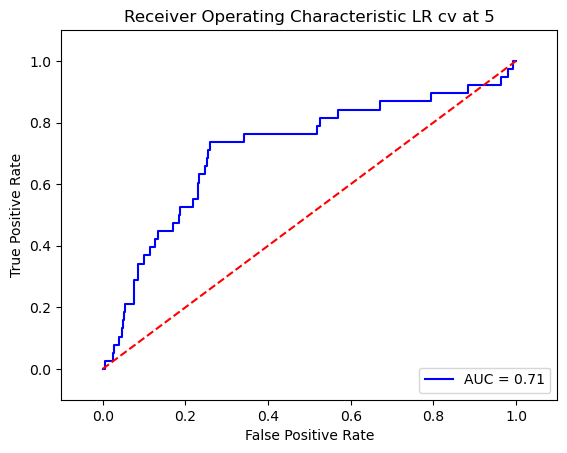

In [27]:
# soft prediction evaluation with roc of resampled data
fpr, tpr, thresholds = roc_curve(y_test, y_hat_soft_cv)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic LR cv at 5')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


**This graph looked strange so I will try by not using a pipeline and just using the normalized training data from earlier.**

#### Add comments on model evaluation and  cross-validation


4. Increase the number of folds and train the CV model again:
 1. train a cross-validation logistic regression
    - Use the same `X_train` and `y_train`.
    - You may want to use `random_state = 0` to make your results the same as others.
    - Set the `cv` parameter to 10 
    - Set `class_weight` so the weights are balanced
 2. predict (hard and soft) on training and test features with `.predict()` and `.predict_proba()`
 3. evaluate test and training predictions using confusion matrix (`confusion_matrix`) and its metrics (`classification_report`)
 4. evaluate test and training predictions using ROC
 5. comment on whether cross-validation makes a difference in the results. 
<br/><span style="color:red" float:right>[2 point]</span>

In [28]:
# Add code to train logistic regression cross-validation (cv = 10)

lrcv_pipeline10 = make_pipeline(StandardScaler(),
                             LogisticRegressionCV(random_state=42, cv=10, class_weight='balanced'))


In [29]:
# Add code to predict (hard and soft) on training and test features
# fit to the pipeline
start = time.time()
lrcv_pipeline10.fit(X_train, y_train)

# Add code to predict (hard and soft) on training and test features
y_hat_hard_cv10 = lrcv_pipeline10.predict(X_test)
y_hat_soft_cv10 = lrcv_pipeline10.predict_proba(X_test)[:,1]

end = time.time()
print('The total time to run the 10 fold training is:', round(end - start, 3), 'seconds')

The total time to run the 10 fold training is: 2.771 seconds


**This runtime for 10 fold cv is roughly double that of 5 fold.**

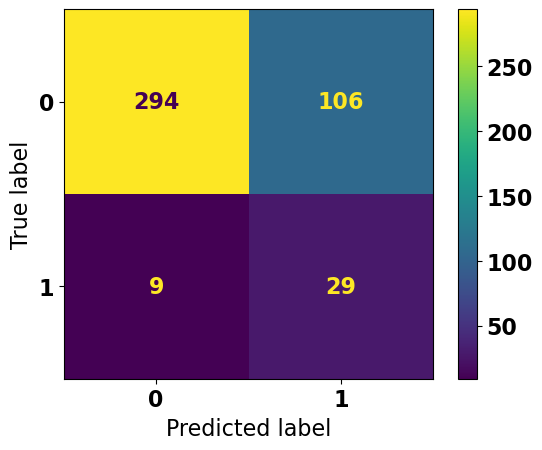

In [30]:
# Add code to evaluate model using confusion matrix and its metrics
conmat_hard_test = confusion_matrix(y_test, y_hat_hard_cv10)
cmd = ConfusionMatrixDisplay(confusion_matrix=conmat_hard_test, display_labels=["0", "1"])
font = {'weight' : 'bold', 'size'   : 16}
plt.rc('font', **font)
cmd.plot();
plt.rcdefaults();

In [31]:
# hard prediction report
print(f'Accuracy: {accuracy_score(y_test, y_hat_hard_cv10):.3f}')
print(f'Score from model: {lrcv_pipeline10.score(X_test, y_test):.3f}')
print(classification_report(y_test, y_hat_hard_cv10))

Accuracy: 0.737
Score from model: 0.737
              precision    recall  f1-score   support

       False       0.97      0.73      0.84       400
        True       0.21      0.76      0.34        38

    accuracy                           0.74       438
   macro avg       0.59      0.75      0.59       438
weighted avg       0.90      0.74      0.79       438



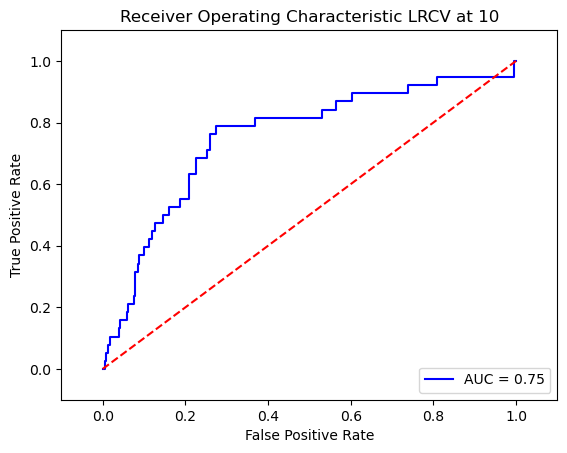

In [32]:
# soft prediction evaluation with roc of lrcv at 10
fpr, tpr, thresholds = roc_curve(y_test, y_hat_soft_cv10)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic LRCV at 10')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Add comments on model evaluation and extended cross-validation
**Adding the 5 extra folds brings our AUC from 0.71 to 0.75 meaning the model is slightly better. However, the training time is roughly double for only a .04 increase in performance. Looking at the accuracy, precision, f1-score are very similar. The 10 fold model is 8% better at predicting positive instances. This fact could make the compromise in training time worth it. The 5 fold model has a slightly better accuracy interestingly enough, but again, if we're more interested in positive instances and not necessarily overall performance this fact might not matter much.**

5. What was the cost of increasing the number of folds in terms of training run-time? <span style="color:red" float:right>[2 point]</span>

In [33]:
# Add code here to determine cost of increasing folds
for i in range(2,11):
    # get start time of loop
    start = time.time()
    # create pipeline with cv as variable
    lrcv_pipeline = make_pipeline(StandardScaler(),
                             LogisticRegressionCV(random_state=42, cv=i, class_weight='balanced'))
    # fit lrcv_pipeline
    lrcv_pipeline.fit(X_train, y_train)
    end = time.time()
    print(f'The time for training with {i} folds is {(end-start):.2f} seconds')
    

The time for training with 2 folds is 0.49 seconds
The time for training with 3 folds is 0.80 seconds
The time for training with 4 folds is 1.17 seconds
The time for training with 5 folds is 1.41 seconds
The time for training with 6 folds is 1.78 seconds
The time for training with 7 folds is 2.03 seconds
The time for training with 8 folds is 2.38 seconds
The time for training with 9 folds is 2.64 seconds
The time for training with 10 folds is 3.26 seconds


**From above when I was timing both the training and predicting it was clear that increasing the number of folds during training increases the run time of the cell. Using this for loop we can see how incrementally the training time increases with each fold increase. In both cases there is almost a 1:1 relationship with folds and training time where from 5 to 10 folds the training time nearly doubles.**


# End of assignment